In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

# GridSearch

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'degree': np.arange(0, 11)
}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=3, verbose=2)

In [4]:
start_time = time.time()
grid_search.fit(X, y)
time_normal_gs = time.time() - start_time

Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=3; total time=   0.0s
[CV] END ...................................C=0.01, degree=3; total time=   0.0s
[CV] END ...................................C=0

In [5]:
grid_search.best_score_

0.9367399981435068

In [6]:
grid_search.best_params_

{'C': 1000, 'degree': 5}

In [7]:
gs_results = pd.DataFrame(grid_search.cv_results_)
gs_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
gs_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
60,0.006015,0.001436,0.000654,0.000463,1000.0,5,"{'C': 1000, 'degree': 5}",0.905263,0.963158,0.941799,0.936740,0.023905,1
57,0.004333,0.000943,0.000671,0.000474,1000.0,2,"{'C': 1000, 'degree': 2}",0.915789,0.963158,0.931217,0.936721,0.019726,2
61,0.010333,0.006204,0.001010,0.000012,1000.0,6,"{'C': 1000, 'degree': 6}",0.905263,0.957895,0.941799,0.934986,0.022020,3
59,0.005172,0.001309,0.000339,0.000480,1000.0,4,"{'C': 1000, 'degree': 4}",0.905263,0.963158,0.936508,0.934976,0.023660,4
56,0.002331,0.000473,0.000667,0.000472,1000.0,1,"{'C': 1000, 'degree': 1}",0.910526,0.968421,0.925926,0.934958,0.024483,5


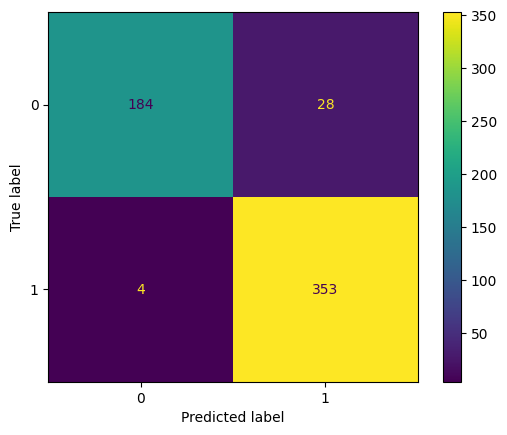

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_search, X, y)

# Halving Grid Search

In [9]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

halving_grid_search = HalvingGridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=3, verbose=2)

start_time = time.time()
halving_grid_search.fit(X, y)
time_halving_gs = time.time() - start_time

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 21
max_resources_: 569
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 66
n_resources: 21
Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=0; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=1; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...................................C=0.01, degree=2; total time=   0.0s
[CV] END ...

In [10]:
halving_grid_search.best_score_

0.9311325002814365

In [11]:
halving_grid_search.best_params_

{'C': 100, 'degree': 5}

In [12]:
print(f"Doorlooptijd normale GS: {time_normal_gs}")
print(f"Doorlooptijd halving GS: {time_halving_gs}")

Doorlooptijd normale GS: 1.0486547946929932
Doorlooptijd halving GS: 0.6092767715454102


# Randomized Search

In [13]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'C': np.linspace(0, 1000, 10000),
    'degree': np.arange(0, 11)
}

rand_search = RandomizedSearchCV(SVC(kernel='poly'), param_distributions=param_distribs, n_iter=10, cv=3, verbose=2)
rand_search.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................C=538.8538853885389, degree=9; total time=   0.0s
[CV] END ......................C=538.8538853885389, degree=9; total time=   0.0s
[CV] END ......................C=538.8538853885389, degree=9; total time=   0.0s
[CV] END ....................C=458.84588458845883, degree=10; total time=   0.0s
[CV] END ....................C=458.84588458845883, degree=10; total time=   0.0s
[CV] END ....................C=458.84588458845883, degree=10; total time=   0.0s
[CV] END ......................C=300.2300230023002, degree=2; total time=   0.0s
[CV] END ......................C=300.2300230023002, degree=2; total time=   0.0s
[CV] END ......................C=300.2300230023002, degree=2; total time=   0.0s
[CV] END .....................C=375.73757375737574, degree=6; total time=   0.0s
[CV] END .....................C=375.73757375737574, degree=6; total time=   0.0s
[CV] END .....................C=375.737573757375

RandomizedSearchCV(cv=3, estimator=SVC(kernel='poly'),
                   param_distributions={'C': array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03]),
                                        'degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   verbose=2)

In [14]:
rand_search.best_score_

0.933249791144528

In [15]:
rand_search.best_params_

{'degree': 7, 'C': 519.3519351935194}

In [16]:
rs_results = pd.DataFrame(rand_search.cv_results_)
rs_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
rs_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.008170,0.003010,0.001680,0.000464,7,519.351935,"{'degree': 7, 'C': 519.3519351935194}",0.900000,0.947368,0.952381,0.933250,0.023600,1
8,0.010007,0.004080,0.001002,0.000001,6,984.798480,"{'degree': 6, 'C': 984.7984798479847}",0.905263,0.957895,0.936508,0.933222,0.021612,2
6,0.009000,0.004547,0.001005,0.000005,8,373.037304,"{'degree': 8, 'C': 373.037303730373}",0.900000,0.942105,0.952381,0.931495,0.022662,3
3,0.005501,0.000407,0.001668,0.000469,6,375.737574,"{'degree': 6, 'C': 375.73757375737574}",0.900000,0.942105,0.947090,0.929732,0.021122,4
4,0.005333,0.000942,0.001668,0.000470,8,234.823482,"{'degree': 8, 'C': 234.82348234823482}",0.900000,0.942105,0.947090,0.929732,0.021122,4


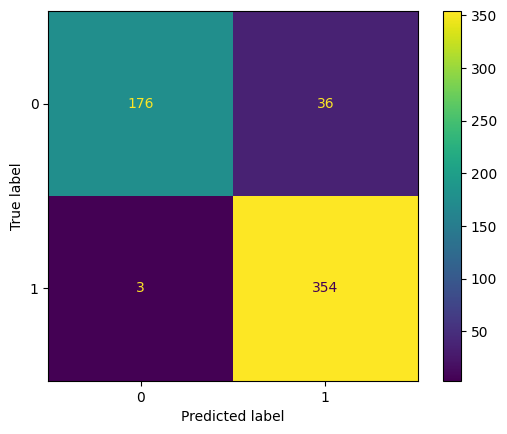

In [34]:
ConfusionMatrixDisplay.from_estimator(rand_search, X, y)